In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

try:
    from pdtr import ParseDecisionTreeRules
except ModuleNotFoundError:
    import sys
    
    sys.path.append("../")
    from pdtr import ParseDecisionTreeRules

np.random.seed(1)

In [2]:
# !pip install -r ../requirements.txt -U
# !pip install git+https://github.com/itlubber/scorecardpipeline.git
# !pip install -U scorecardpipeline -i https://pypi.Python.org/simple

In [3]:
feature_map = {}
n_samples = 10000
ab = np.array(list('ABCDEFG'))

data = pd.DataFrame({
    'A': np.random.randint(10, size = n_samples),
    'B': ab[np.random.choice(7, n_samples)],
    'C': ab[np.random.choice(2, n_samples)],
    'D': np.random.random(size = n_samples),
    'target': np.random.randint(2, size = n_samples)
})

train, test = train_test_split(data, test_size=0.3, shuffle=data["target"])

,组合策略,命中数,命中率,好样本数,好样本占比,坏样本数,坏样本占比,坏率,样本整体坏率,LIFT值
0,D > 0.999 & A <= 6.5,7,0.0010,7,0.0019,0,0.0000,0.0000,0.4863,0.0000
1,D <= 0.999 & D <= 0.999,6986,0.9980,3589,0.9981,3397,0.9979,0.4863,0.4863,0.9999
2,D <= 0.999 & D > 0.999,6,0.0009,0,0.0000,6,0.0018,1.0000,0.4863,2.0564
3,D > 0.999 & A > 6.5,1,0.0001,0,0.0000,1,0.0003,1.0000,0.4863,2.0564


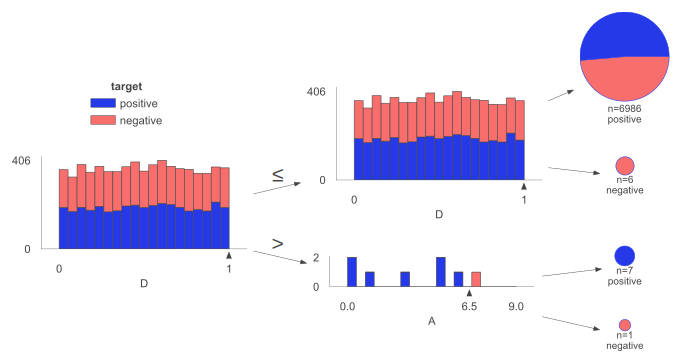

,组合策略,命中数,命中率,好样本数,好样本占比,坏样本数,坏样本占比,坏率,样本整体坏率,LIFT值
0,B <= 0.49 & C <= 0.486,2553,0.3647,1345,0.3740,1208,0.3549,0.4732,0.4863,0.9730
1,B <= 0.49 & C > 0.486,2531,0.3616,1290,0.3587,1241,0.3646,0.4903,0.4863,1.0083
2,B > 0.49 & C <= 0.486,966,0.1380,489,0.1360,477,0.1401,0.4938,0.4863,1.0154
3,B > 0.49 & C > 0.486,950,0.1357,472,0.1313,478,0.1404,0.5032,0.4863,1.0347


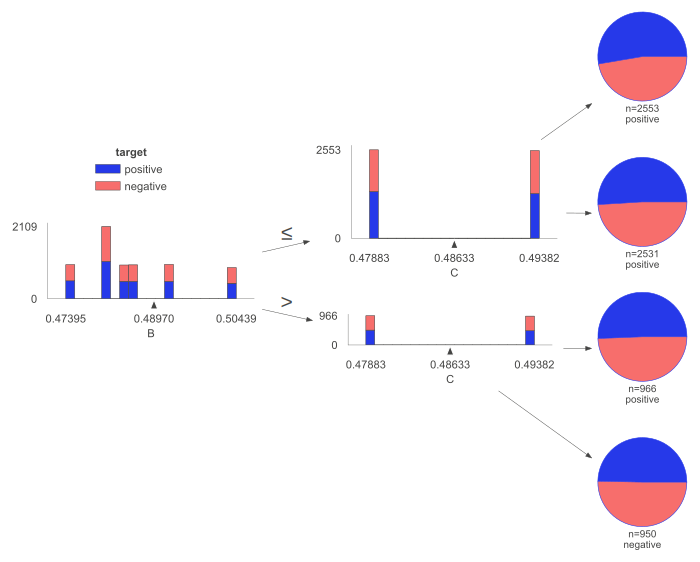

,组合策略,命中数,命中率,好样本数,好样本占比,坏样本数,坏样本占比,坏率,样本整体坏率,LIFT值
0,A <= 5.5 & A > 3.5,1451,0.2073,769,0.2138,682,0.2004,0.4700,0.4863,0.9666
1,A > 5.5 & B <= 0.483,1234,0.1763,638,0.1774,596,0.1751,0.4830,0.4863,0.9932
2,A <= 5.5 & A <= 3.5,2770,0.3957,1431,0.3979,1339,0.3934,0.4834,0.4863,0.9941
3,A > 5.5 & B > 0.483,1545,0.2207,758,0.2108,787,0.2312,0.5094,0.4863,1.0475


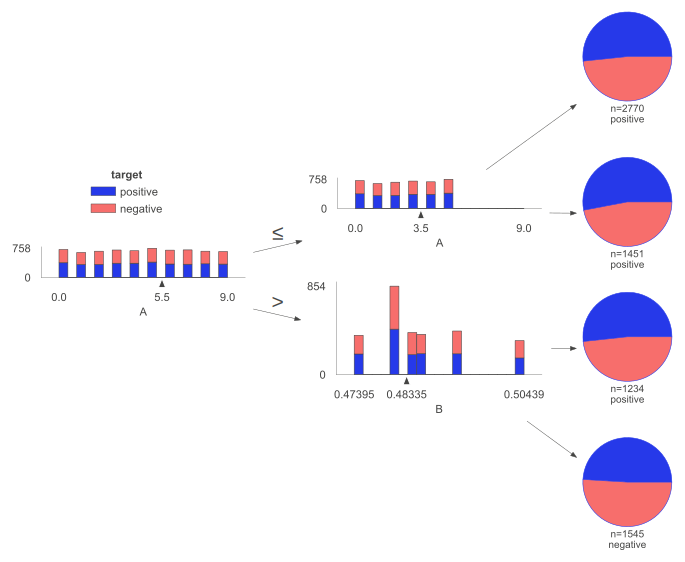

In [4]:
pdtr_instance = ParseDecisionTreeRules(target="target", max_iter=8)
pdtr_instance.fit(train, lift=0., max_depth=2, max_samples=1., verbose=True, max_features="auto")
all_rules = pdtr_instance.insert_all_rules(test=test)
pdtr_instance.save()

In [5]:
all_rules[0]

,组合策略,命中数,命中率,好样本数,好样本占比,坏样本数,坏样本占比,坏率,样本整体坏率,LIFT值
0,D > 0.999 & A <= 6.5,7,0.0010,7,0.0019,0,0.0000,0.0000,0.4863,0.0000
1,D <= 0.999 & D <= 0.999,6986,0.9980,3589,0.9981,3397,0.9979,0.4863,0.4863,0.9999
2,D <= 0.999 & D > 0.999,6,0.0009,0,0.0000,6,0.0018,1.0000,0.4863,2.0564
3,D > 0.999 & A > 6.5,1,0.0001,0,0.0000,1,0.0003,1.0000,0.4863,2.0564
4,B <= 0.49 & C <= 0.486,2553,0.3647,1345,0.3740,1208,0.3549,0.4732,0.4863,0.9730
5,B <= 0.49 & C > 0.486,2531,0.3616,1290,0.3587,1241,0.3646,0.4903,0.4863,1.0083
6,B > 0.49 & C <= 0.486,966,0.1380,489,0.1360,477,0.1401,0.4938,0.4863,1.0154
7,B > 0.49 & C > 0.486,950,0.1357,472,0.1313,478,0.1404,0.5032,0.4863,1.0347
8,A <= 5.5 & A > 3.5,1451,0.2073,769,0.2138,682,0.2004,0.4700,0.4863,0.9666
9,A > 5.5 & B <= 0.483,1234,0.1763,638,0.1774,596,0.1751,0.4830,0.4863,0.9932


In [6]:
all_rules[1]

,组合策略,命中数,命中率,好样本数,好样本占比,坏样本数,坏样本占比,坏率,样本整体坏率,LIFT值
0,D > 0.999 & A <= 6.5,1,0.0003,0,0.0000,1,0.0007,1.0000,0.4867,2.0548
1,D <= 0.999 & D <= 0.999,2999,0.9997,1540,1.0000,1459,0.9993,0.4865,0.4867,0.9996
2,D <= 0.999 & D > 0.999,0,0.0000,0,0.0000,0,0.0000,0.0000,0.4867,0.0000
3,D > 0.999 & A > 6.5,0,0.0000,0,0.0000,0,0.0000,0.0000,0.4867,0.0000
4,B <= 0.49 & C <= 0.486,1068,0.3560,541,0.3513,527,0.3610,0.4934,0.4867,1.0139
5,B <= 0.49 & C > 0.486,1063,0.3543,549,0.3565,514,0.3521,0.4835,0.4867,0.9936
6,B > 0.49 & C <= 0.486,445,0.1483,228,0.1481,217,0.1486,0.4876,0.4867,1.0020
7,B > 0.49 & C > 0.486,424,0.1413,222,0.1442,202,0.1384,0.4764,0.4867,0.9789
8,A <= 5.5 & A > 3.5,604,0.2013,319,0.2071,285,0.1952,0.4719,0.4867,0.9696
9,A > 5.5 & B <= 0.483,509,0.1697,248,0.1610,261,0.1788,0.5128,0.4867,1.0536


,指标名称,指标含义,分箱,样本总数,样本占比,好样本数,好样本占比,坏样本数,坏样本占比,坏样本率,分档WOE值,分档IV值,指标IV值,LIFT值,累积LIFT值,累积好样本数,累积坏样本数,分档KS值
0,A,训练数据集,"[负无穷 , 1.5)",1375,0.1964,720,0.2002,655,0.1924,0.4764,0.0397,0.0003,0.0036,0.9796,0.9796,720,655,-0.0078
1,A,训练数据集,"[1.5 , 3.5)",1395,0.1993,711,0.1977,684,0.2009,0.4903,-0.0162,0.0001,0.0036,1.0083,0.9941,1431,1339,-0.0046
2,A,训练数据集,"[3.5 , 5.5)",1451,0.2073,769,0.2138,682,0.2004,0.4700,0.0652,0.0009,0.0036,0.9666,0.9846,2200,2021,-0.0181
3,A,训练数据集,"[5.5 , 7.5)",1424,0.2034,694,0.1930,730,0.2145,0.5126,-0.1054,0.0023,0.0036,1.0542,1.0022,2894,2751,0.0034
4,A,训练数据集,"[7.5 , 正无穷)",1355,0.1936,702,0.1952,653,0.1918,0.4819,0.0175,0.0001,0.0036,0.9910,1.0000,3596,3404,0.0000


,指标名称,指标含义,分箱,样本总数,样本占比,好样本数,好样本占比,坏样本数,坏样本占比,坏样本率,分档WOE值,分档IV值,指标IV值,LIFT值,累积LIFT值,累积好样本数,累积坏样本数,分档KS值
0,A,测试数据集,"[负无穷 , 1.5)",562,0.1873,287,0.1864,275,0.1884,0.4893,-0.0106,0.0000,0.0023,1.0055,1.0055,287,275,0.0020
1,A,测试数据集,"[1.5 , 3.5)",600,0.2000,304,0.1974,296,0.2027,0.4933,-0.0267,0.0001,0.0023,1.0137,1.0097,591,571,0.0073
2,A,测试数据集,"[3.5 , 5.5)",604,0.2013,319,0.2071,285,0.1952,0.4719,0.0594,0.0007,0.0023,0.9696,0.9960,910,856,-0.0046
3,A,测试数据集,"[5.5 , 7.5)",613,0.2043,304,0.1974,309,0.2116,0.5041,-0.0697,0.0010,0.0023,1.0358,1.0062,1214,1165,0.0096
4,A,测试数据集,"[7.5 , 正无穷)",621,0.2070,326,0.2117,295,0.2021,0.4750,0.0466,0.0004,0.0023,0.9761,1.0000,1540,1460,0.0000


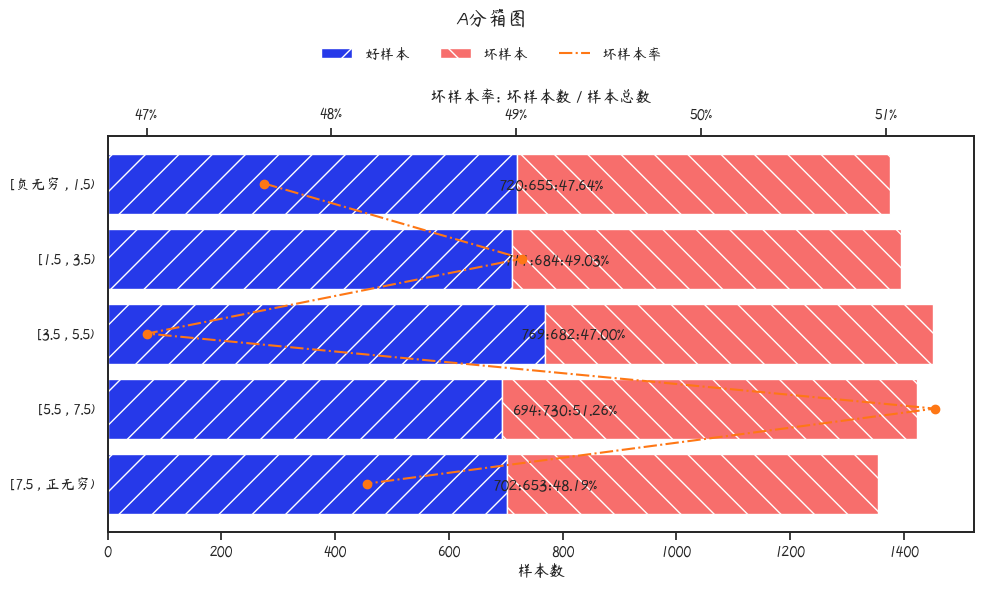

,指标名称,指标含义,分箱,样本总数,样本占比,好样本数,好样本占比,坏样本数,坏样本占比,坏样本率,分档WOE值,分档IV值,指标IV值,LIFT值,累积LIFT值,累积好样本数,累积坏样本数,分档KS值
0,B,训练数据集,"A,D",2057,0.2939,1074,0.2987,983,0.2888,0.4779,0.0337,0.0003,0.0010,0.9827,0.9827,1074,983,-0.0099
1,B,训练数据集,C,1050,0.1500,544,0.1513,506,0.1486,0.4819,0.0175,0.0000,0.0010,0.9910,0.9855,1618,1489,-0.0125
2,B,训练数据集,"G,F",1977,0.2824,1017,0.2828,960,0.2820,0.4856,0.0028,0.0000,0.0010,0.9986,0.9906,2635,2449,-0.0133
3,B,训练数据集,"B,E",1916,0.2737,961,0.2672,955,0.2806,0.4984,-0.0486,0.0006,0.0010,1.0250,1.0000,3596,3404,0.0000


,指标名称,指标含义,分箱,样本总数,样本占比,好样本数,好样本占比,坏样本数,坏样本占比,坏样本率,分档WOE值,分档IV值,指标IV值,LIFT值,累积LIFT值,累积好样本数,累积坏样本数,分档KS值
0,B,测试数据集,"A,D",870,0.2900,430,0.2792,440,0.3014,0.5057,-0.0763,0.0017,0.0044,1.0392,1.0392,430,440,0.0221
1,B,测试数据集,C,432,0.1440,216,0.1403,216,0.1479,0.5000,-0.0534,0.0004,0.0044,1.0274,1.0353,646,656,0.0298
2,B,测试数据集,"G,F",829,0.2763,444,0.2883,385,0.2637,0.4644,0.0892,0.0022,0.0044,0.9543,1.0038,1090,1041,0.0052
3,B,测试数据集,"B,E",869,0.2897,450,0.2922,419,0.2870,0.4822,0.0180,0.0001,0.0044,0.9907,1.0000,1540,1460,0.0000


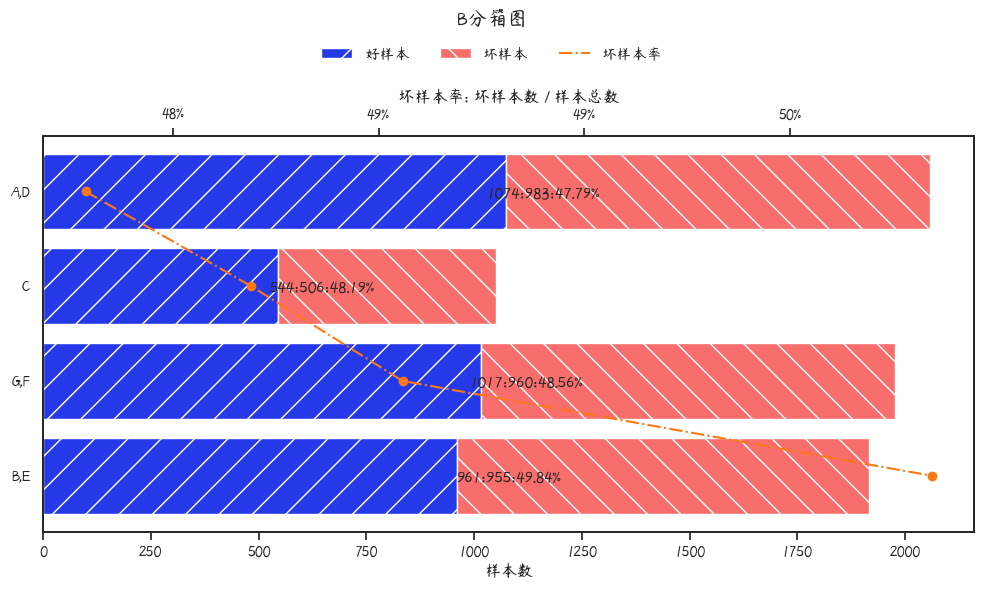

,指标名称,指标含义,分箱,样本总数,样本占比,好样本数,好样本占比,坏样本数,坏样本占比,坏样本率,分档WOE值,分档IV值,指标IV值,LIFT值,累积LIFT值,累积好样本数,累积坏样本数,分档KS值
0,C,训练数据集,B,3519,0.5027,1834,0.5100,1685,0.4950,0.4788,0.0299,0.0004,0.0009,0.9847,0.9847,1834,1685,-0.0150
1,C,训练数据集,A,3481,0.4973,1762,0.4900,1719,0.5050,0.4938,-0.0302,0.0005,0.0009,1.0155,1.0000,3596,3404,0.0000


,指标名称,指标含义,分箱,样本总数,样本占比,好样本数,好样本占比,坏样本数,坏样本占比,坏样本率,分档WOE值,分档IV值,指标IV值,LIFT值,累积LIFT值,累积好样本数,累积坏样本数,分档KS值
0,C,测试数据集,B,1513,0.5043,769,0.4994,744,0.5096,0.4917,-0.0203,0.0002,0.0004,1.0104,1.0104,769,744,0.0102
1,C,测试数据集,A,1487,0.4957,771,0.5006,716,0.4904,0.4815,0.0207,0.0002,0.0004,0.9894,1.0000,1540,1460,0.0000


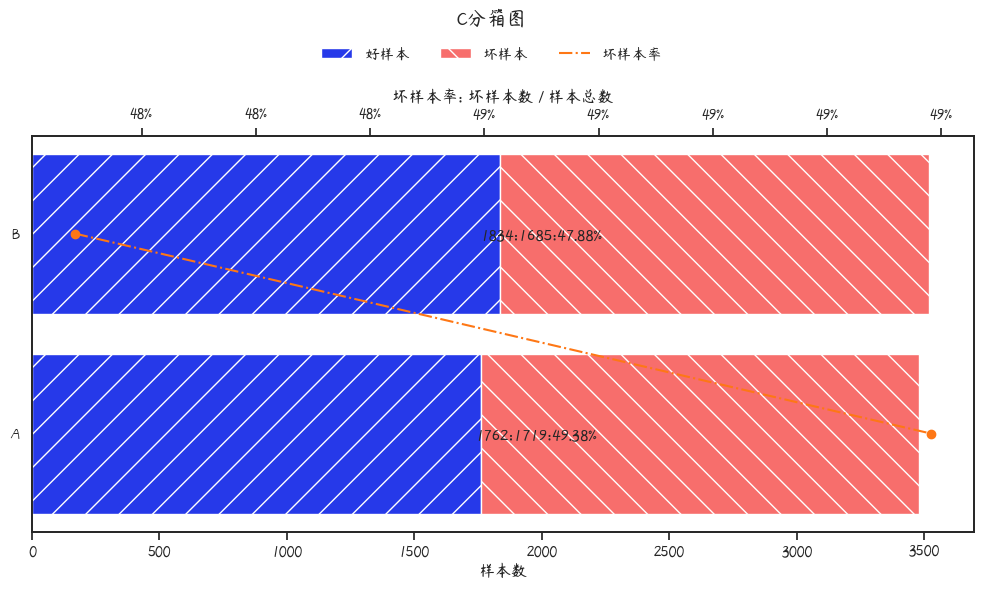

,指标名称,指标含义,分箱,样本总数,样本占比,好样本数,好样本占比,坏样本数,坏样本占比,坏样本率,分档WOE值,分档IV值,指标IV值,LIFT值,累积LIFT值,累积好样本数,累积坏样本数,分档KS值
0,D,训练数据集,"[负无穷 , 0.2488)",1696,0.2423,870,0.2419,826,0.2427,0.4870,-0.0030,0.0000,0.0034,1.0015,1.0015,870,826,0.0007
1,D,训练数据集,"[0.2488 , 0.4015)",1051,0.1501,509,0.1415,542,0.1592,0.5157,-0.1177,0.0021,0.0034,1.0605,1.0241,1379,1368,0.0184
2,D,训练数据集,"[0.4015 , 0.584)",1334,0.1906,694,0.1930,640,0.1880,0.4798,0.0261,0.0001,0.0034,0.9866,1.0118,2073,2008,0.0134
3,D,训练数据集,"[0.584 , 0.7333)",1086,0.1551,582,0.1618,504,0.1481,0.4641,0.0890,0.0012,0.0034,0.9544,0.9997,2655,2512,-0.0004
4,D,训练数据集,"[0.7333 , 正无穷)",1833,0.2619,941,0.2617,892,0.2620,0.4866,-0.0014,0.0000,0.0034,1.0007,1.0000,3596,3404,0.0000


,指标名称,指标含义,分箱,样本总数,样本占比,好样本数,好样本占比,坏样本数,坏样本占比,坏样本率,分档WOE值,分档IV值,指标IV值,LIFT值,累积LIFT值,累积好样本数,累积坏样本数,分档KS值
0,D,测试数据集,"[负无穷 , 0.2488)",743,0.2477,400,0.2597,343,0.2349,0.4616,0.1004,0.0025,0.0064,0.9486,0.9486,400,343,-0.0248
1,D,测试数据集,"[0.2488 , 0.4015)",452,0.1507,230,0.1494,222,0.1521,0.4912,-0.0180,0.0000,0.0064,1.0092,0.9715,630,565,-0.0221
2,D,测试数据集,"[0.4015 , 0.584)",571,0.1903,273,0.1773,298,0.2041,0.5219,-0.1410,0.0038,0.0064,1.0724,1.0041,903,863,0.0047
3,D,测试数据集,"[0.584 , 0.7333)",436,0.1453,226,0.1468,210,0.1438,0.4817,0.0201,0.0001,0.0064,0.9897,1.0013,1129,1073,0.0018
4,D,测试数据集,"[0.7333 , 正无穷)",798,0.2660,411,0.2669,387,0.2651,0.4850,0.0068,0.0000,0.0064,0.9965,1.0000,1540,1460,0.0000


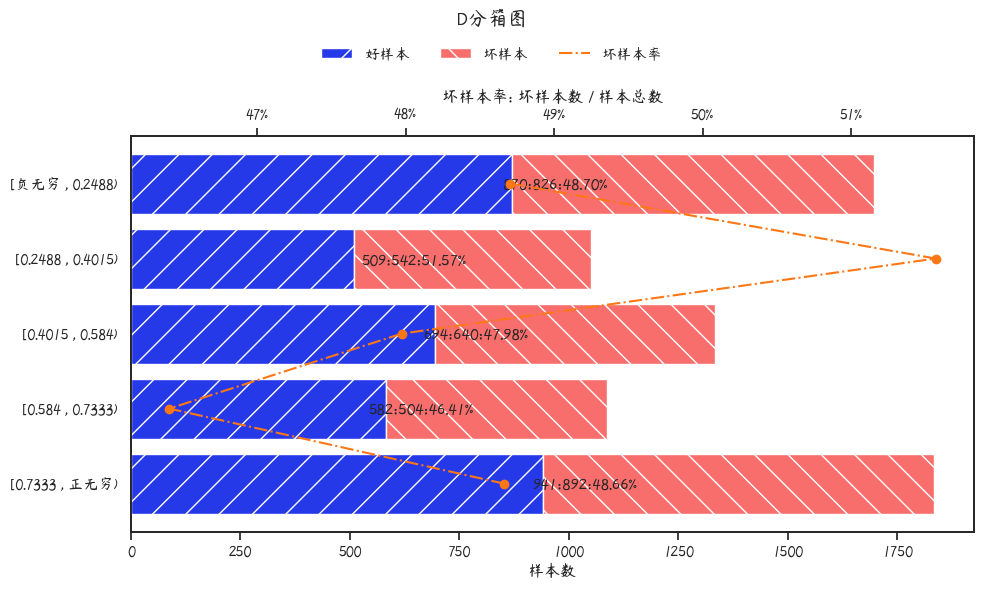

In [13]:
import matplotlib.pyplot as plt
from scorecardpipeline import inverse_feature_bins

for col in data.columns.drop("target"):
    feature_table_train = pdtr_instance.query_feature_rule(train, col, desc="训练数据集", ks=True, min_bin_size=0.15, max_bin_size=3, method="dt")
    feature_table_test = pdtr_instance.query_feature_rule(test, col, desc="测试数据集", ks=True, rules=inverse_feature_bins(feature_table_train))
    display(feature_table_train)
    display(feature_table_test)
    pdtr_instance.bin_plot(feature_table_train, desc=col, save=f"model_report/bin_plots/bin_vars_{col}.png")
    plt.show()

,指标名称,指标含义,分箱,样本总数,样本占比,好样本数,好样本占比,坏样本数,坏样本占比,坏样本率,分档WOE值,分档IV值,指标IV值,LIFT值,累积LIFT值,累积好样本数,累积坏样本数,分档KS值
0,A,单变量策略挖掘,"[负无穷 , 1.5)",1937,0.1937,1007,0.1961,930,0.1912,0.4801,0.0251,0.0001,0.0030,0.9871,0.9871,1007,930,-0.0049
1,A,单变量策略挖掘,"[1.5 , 3.5)",1995,0.1995,1015,0.1976,980,0.2015,0.4912,-0.0193,0.0001,0.0030,1.0099,0.9987,2022,1910,-0.0010
2,A,单变量策略挖掘,"[3.5 , 5.5)",2055,0.2055,1088,0.2118,967,0.1988,0.4706,0.0635,0.0008,0.0030,0.9674,0.9880,3110,2877,-0.0140
3,A,单变量策略挖掘,"[5.5 , 7.5)",2037,0.2037,998,0.1943,1039,0.2136,0.5101,-0.0947,0.0018,0.0030,1.0487,1.0034,4108,3916,0.0053
4,A,单变量策略挖掘,"[7.5 , 正无穷)",1976,0.1976,1028,0.2002,948,0.1949,0.4798,0.0266,0.0001,0.0030,0.9863,1.0000,5136,4864,0.0000


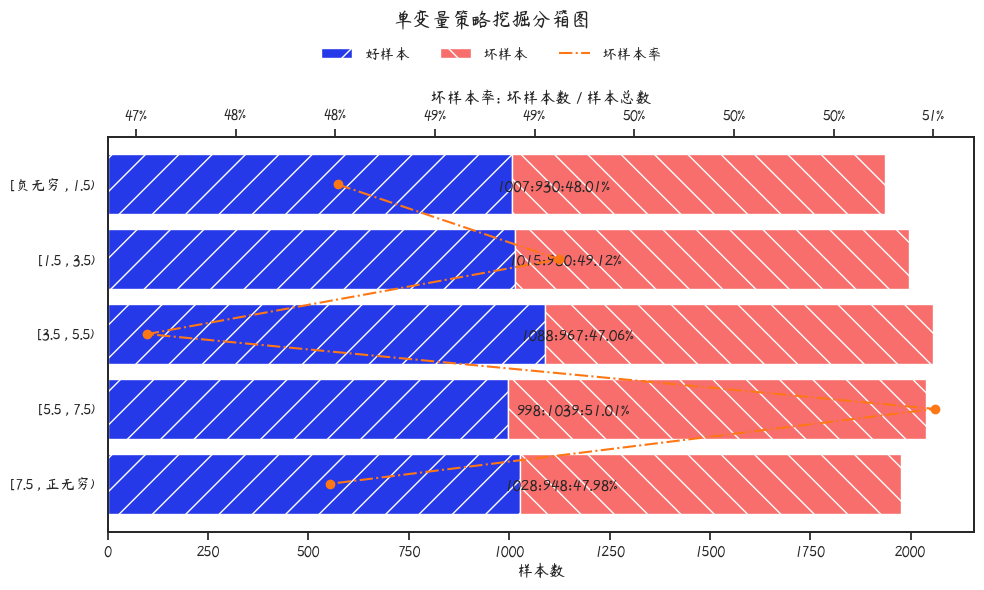

,指标名称,指标含义,分箱,样本总数,样本占比,好样本数,好样本占比,坏样本数,坏样本占比,坏样本率,分档WOE值,分档IV值,指标IV值,LIFT值,累积LIFT值,累积好样本数,累积坏样本数,分档KS值
0,B,单变量策略挖掘,"B,G,F",4245,0.4245,2210,0.4303,2035,0.4184,0.4794,0.0281,0.0003,0.0009,0.9856,0.9856,2210,2035,-0.0119
1,B,单变量策略挖掘,"A,D",2927,0.2927,1504,0.2928,1423,0.2926,0.4862,0.0009,0.0000,0.0009,0.9995,0.9913,3714,3458,-0.0122
2,B,单变量策略挖掘,"E,C",2828,0.2828,1422,0.2769,1406,0.2891,0.4972,-0.0431,0.0005,0.0009,1.0221,1.0000,5136,4864,0.0000


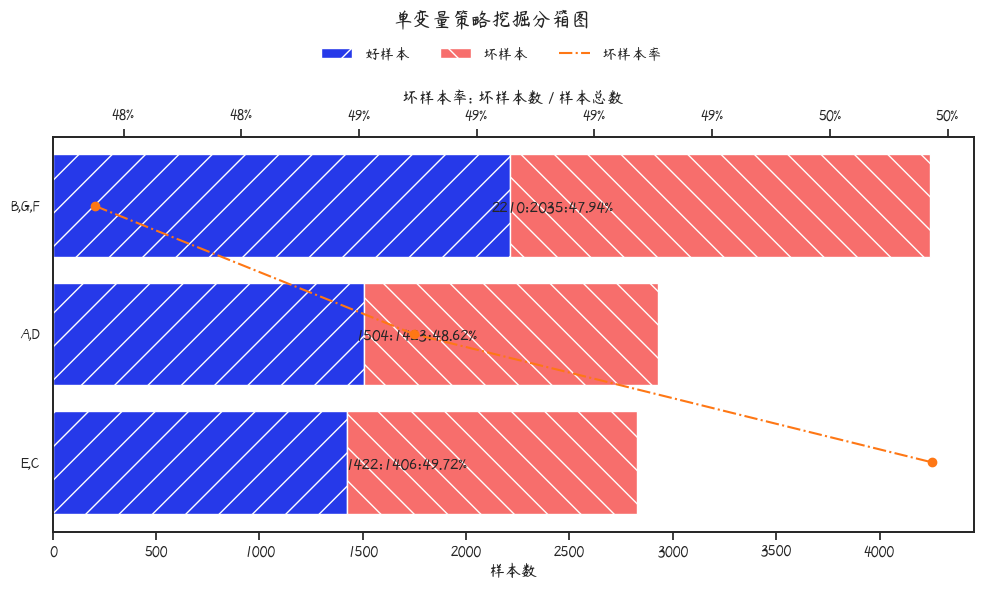

,指标名称,指标含义,分箱,样本总数,样本占比,好样本数,好样本占比,坏样本数,坏样本占比,坏样本率,分档WOE值,分档IV值,指标IV值,LIFT值,累积LIFT值,累积好样本数,累积坏样本数,分档KS值
0,C,单变量策略挖掘,B,5032,0.5032,2603,0.5068,2429,0.4994,0.4827,0.0148,0.0001,0.0002,0.9924,0.9924,2603,2429,-0.0074
1,C,单变量策略挖掘,A,4968,0.4968,2533,0.4932,2435,0.5006,0.4901,-0.0150,0.0001,0.0002,1.0077,1.0000,5136,4864,0.0000


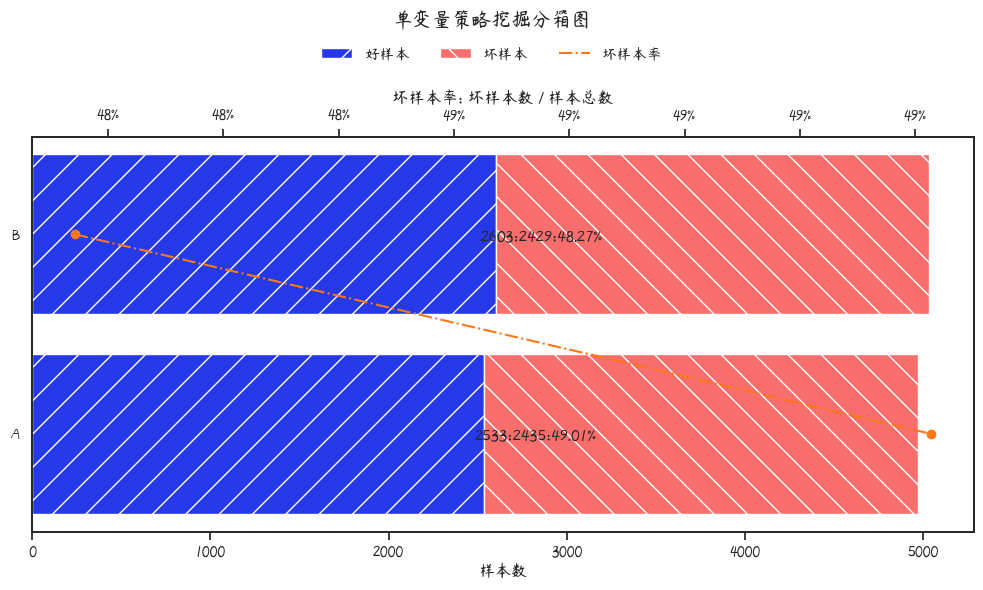

,指标名称,指标含义,分箱,样本总数,样本占比,好样本数,好样本占比,坏样本数,坏样本占比,坏样本率,分档WOE值,分档IV值,指标IV值,LIFT值,累积LIFT值,累积好样本数,累积坏样本数,分档KS值
0,D,单变量策略挖掘,"[负无穷 , 0.251)",2464,0.2464,1285,0.2502,1179,0.2424,0.4785,0.0317,0.0002,0.0029,0.9837,0.9837,1285,1179,-0.0078
1,D,单变量策略挖掘,"[0.251 , 0.4917)",2432,0.2432,1198,0.2333,1234,0.2537,0.5074,-0.0840,0.0017,0.0029,1.0432,1.0133,2483,2413,0.0126
2,D,单变量策略挖掘,"[0.4917 , 0.6728)",1858,0.1858,972,0.1893,886,0.1822,0.4769,0.0382,0.0003,0.0029,0.9804,1.0042,3455,3299,0.0055
3,D,单变量策略挖掘,"[0.6728 , 0.8371)",1623,0.1623,824,0.1604,799,0.1643,0.4923,-0.0236,0.0001,0.0029,1.0121,1.0057,4279,4098,0.0094
4,D,单变量策略挖掘,"[0.8371 , 正无穷)",1623,0.1623,857,0.1669,766,0.1575,0.4720,0.0578,0.0005,0.0029,0.9703,1.0000,5136,4864,0.0000


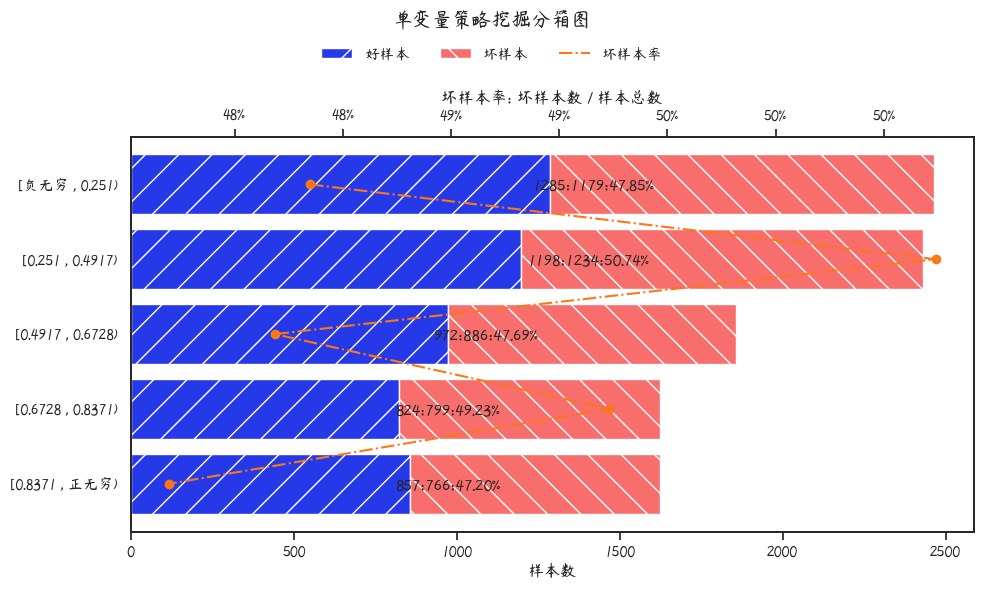

In [15]:
for col in data.columns.drop("target"):
    train_feature_table = pdtr_instance.query_feature_rule(data, col, desc="单变量策略挖掘", plot=True, ks=True, min_bin_size=0.15, max_bin_size=3, method="dt")
    display(train_feature_table)
    plt.show()